## Histogramas
* Um histograma representa a frequência com que cada valor aparece numa imagem;
* Faz uma distribuição **estatística** de cada valor;
* Com este gráfico, podemos:
  * Ter uma ideia geral quanto a iluminação de uma imagem;
  * Ter uma ideia geral quanto o contraste de uma imagem;
  * Ver picos de saturação;
  * Obter valores para thresholding;
  * Etc.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image

In [2]:
girl = np.array(Image.open('girl.jpg'))
(l, c, p) = girl.shape
girl_gray = ((0.2126 * girl[:, :, 0]) + (0.7152 * girl[:, :, 1]) + (0.0722 * girl[:, :, 2])).astype(np.uint8)

In [3]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

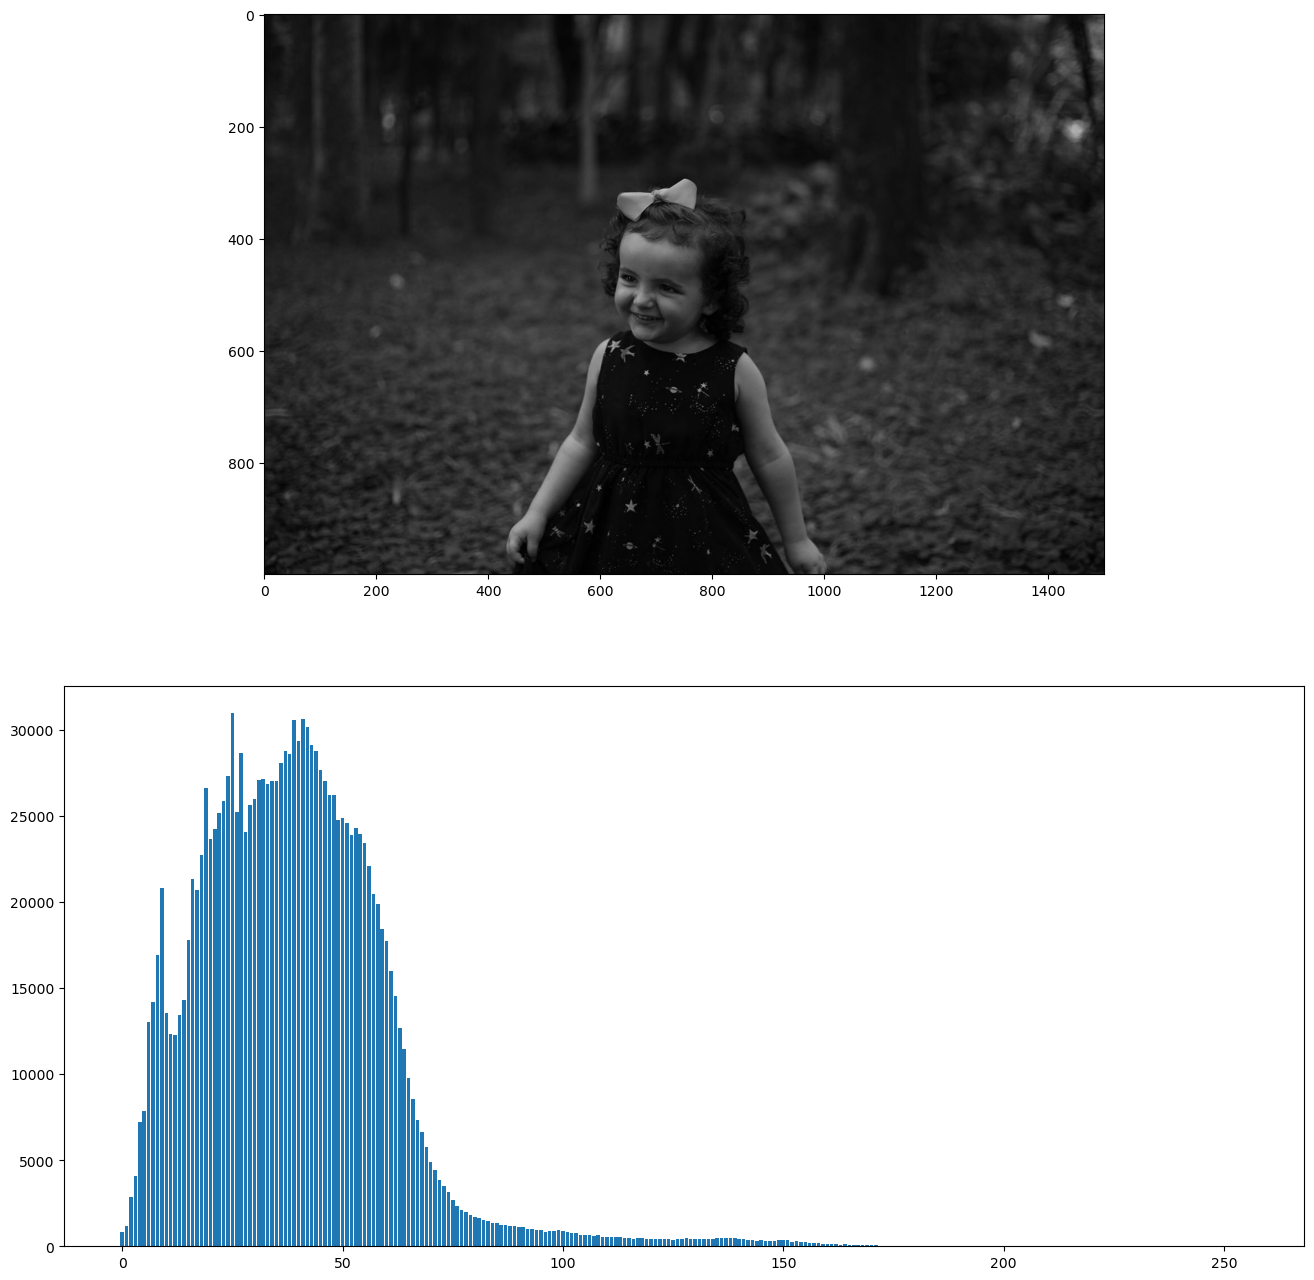

In [6]:
show_histogram_gray(girl_gray)

In [7]:
def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

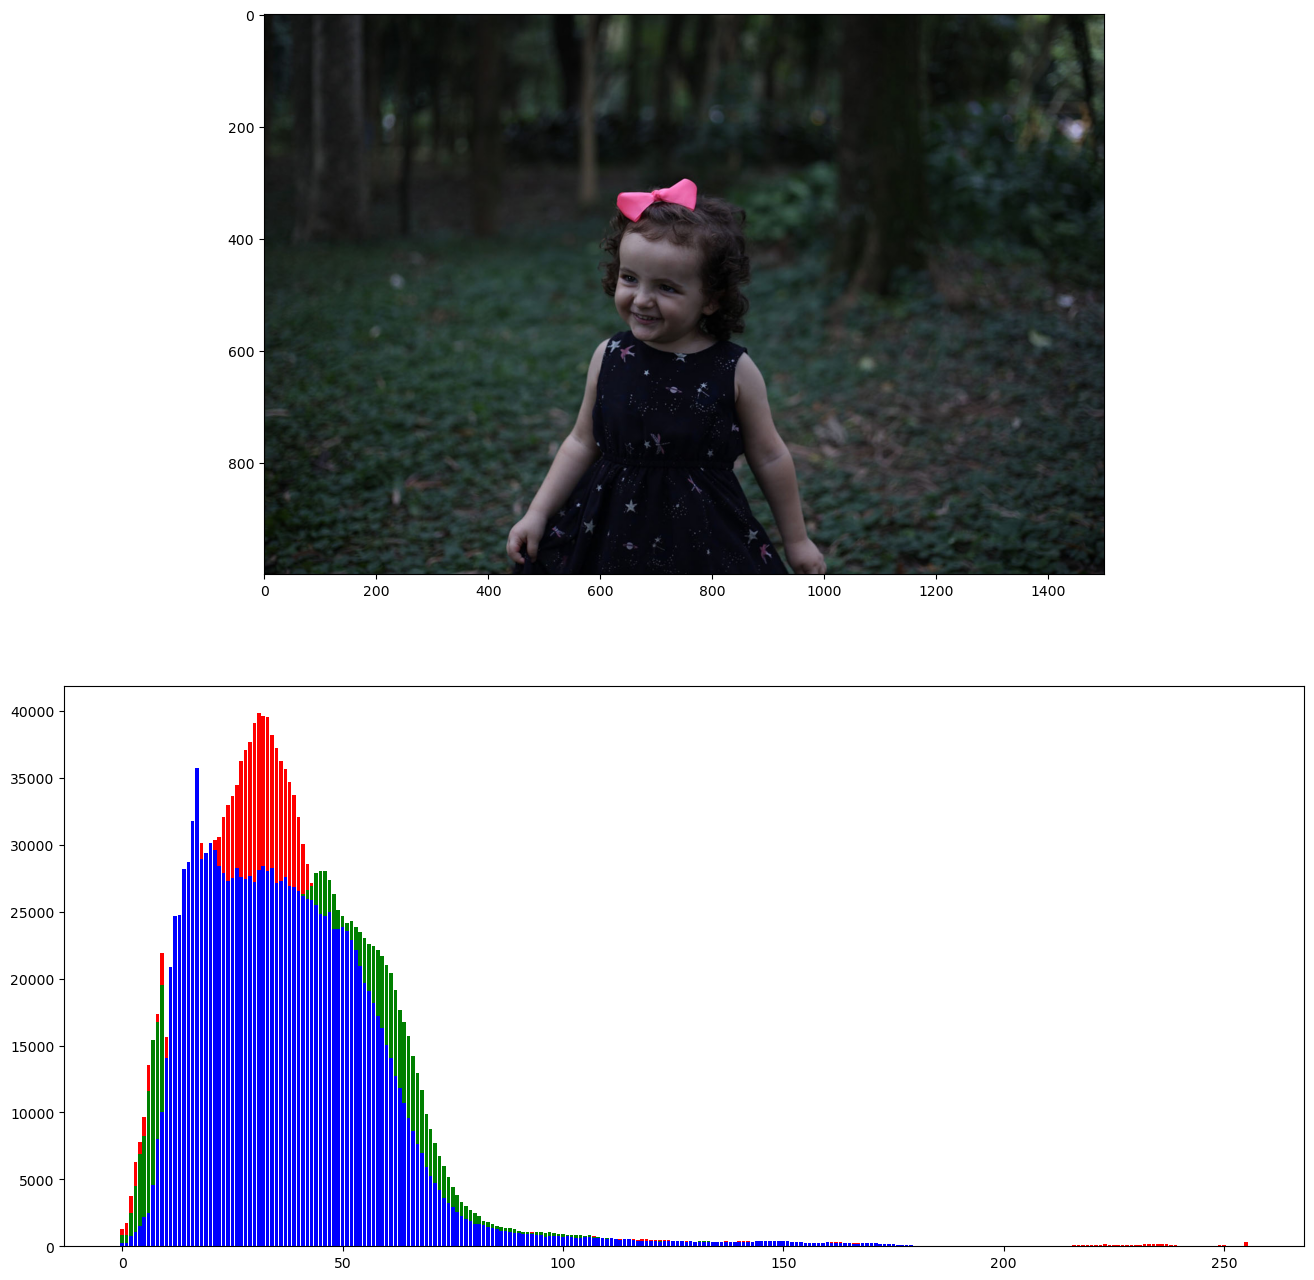

In [8]:
#->Cinza para rgb
def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')
    plt.show()
show_histogram(girl)

### Exemplos (iluminação)
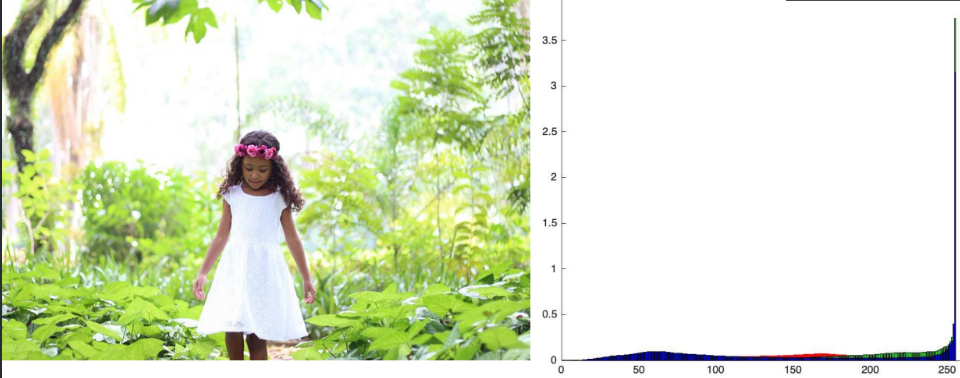

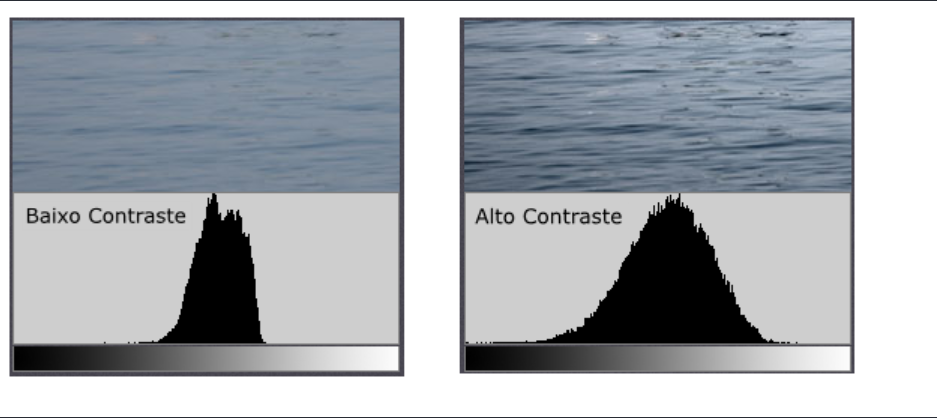

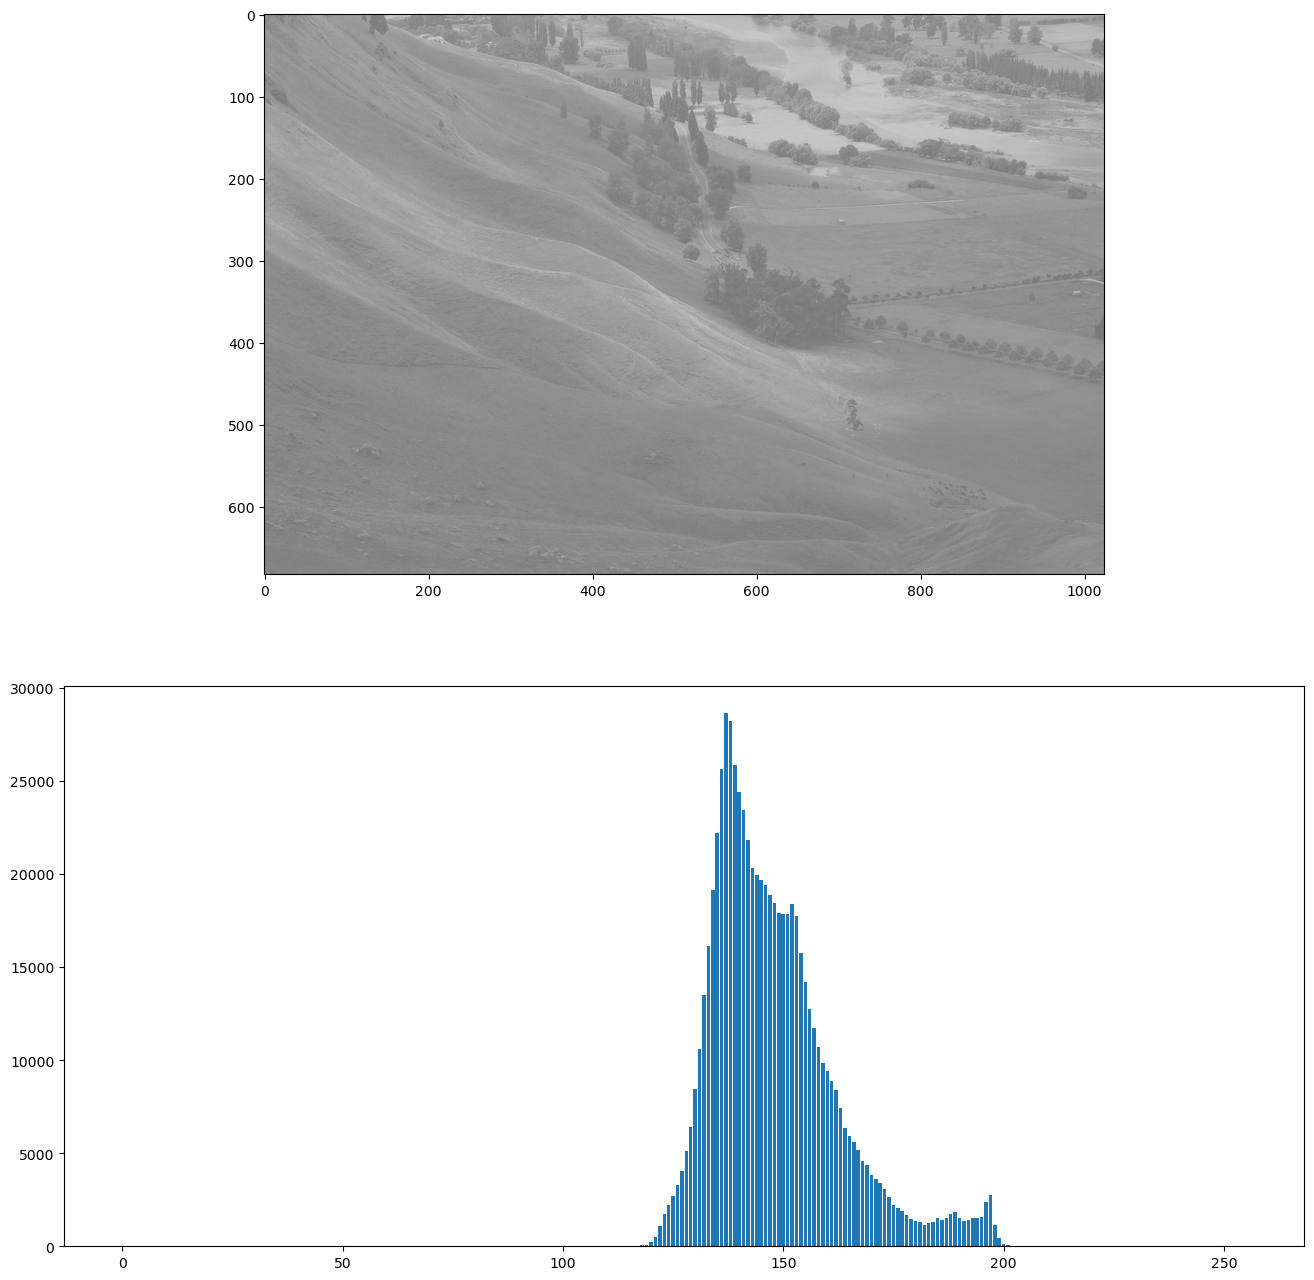

In [9]:
hill = np.array(Image.open('hill.jpg'))
show_histogram_gray(hill)

## Exemplos de saturação

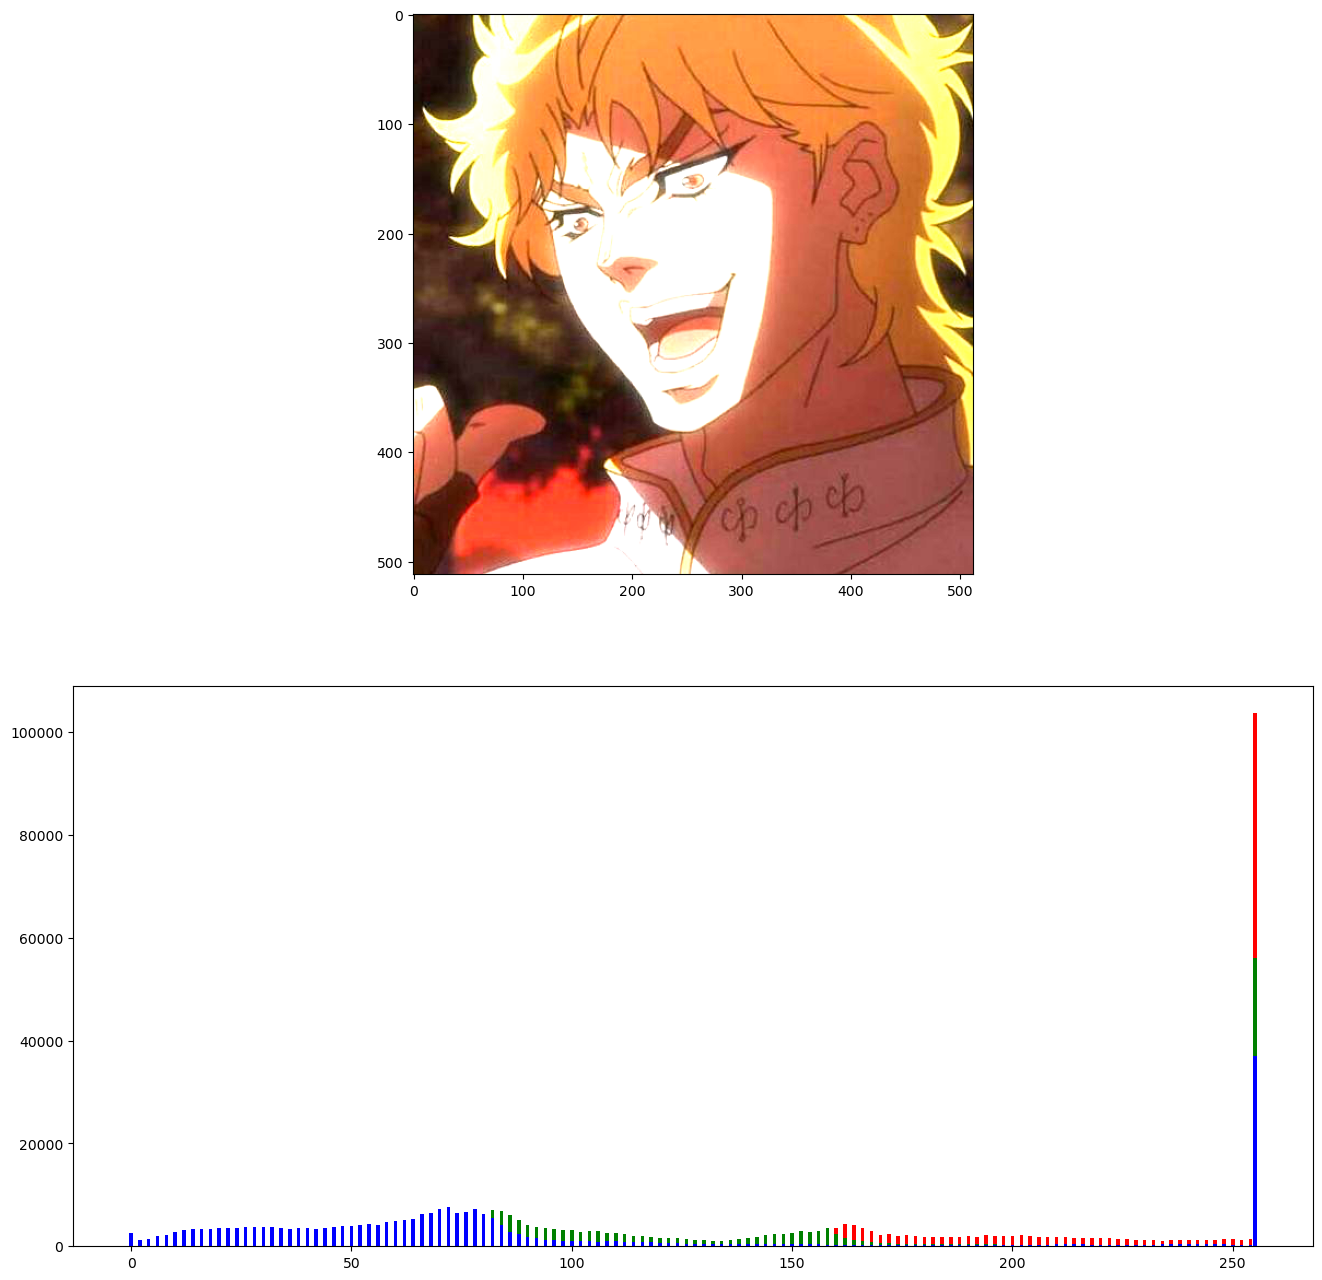

In [12]:
dio = np.array(Image.open('dio_satured.png'))
show_histogram(dio)

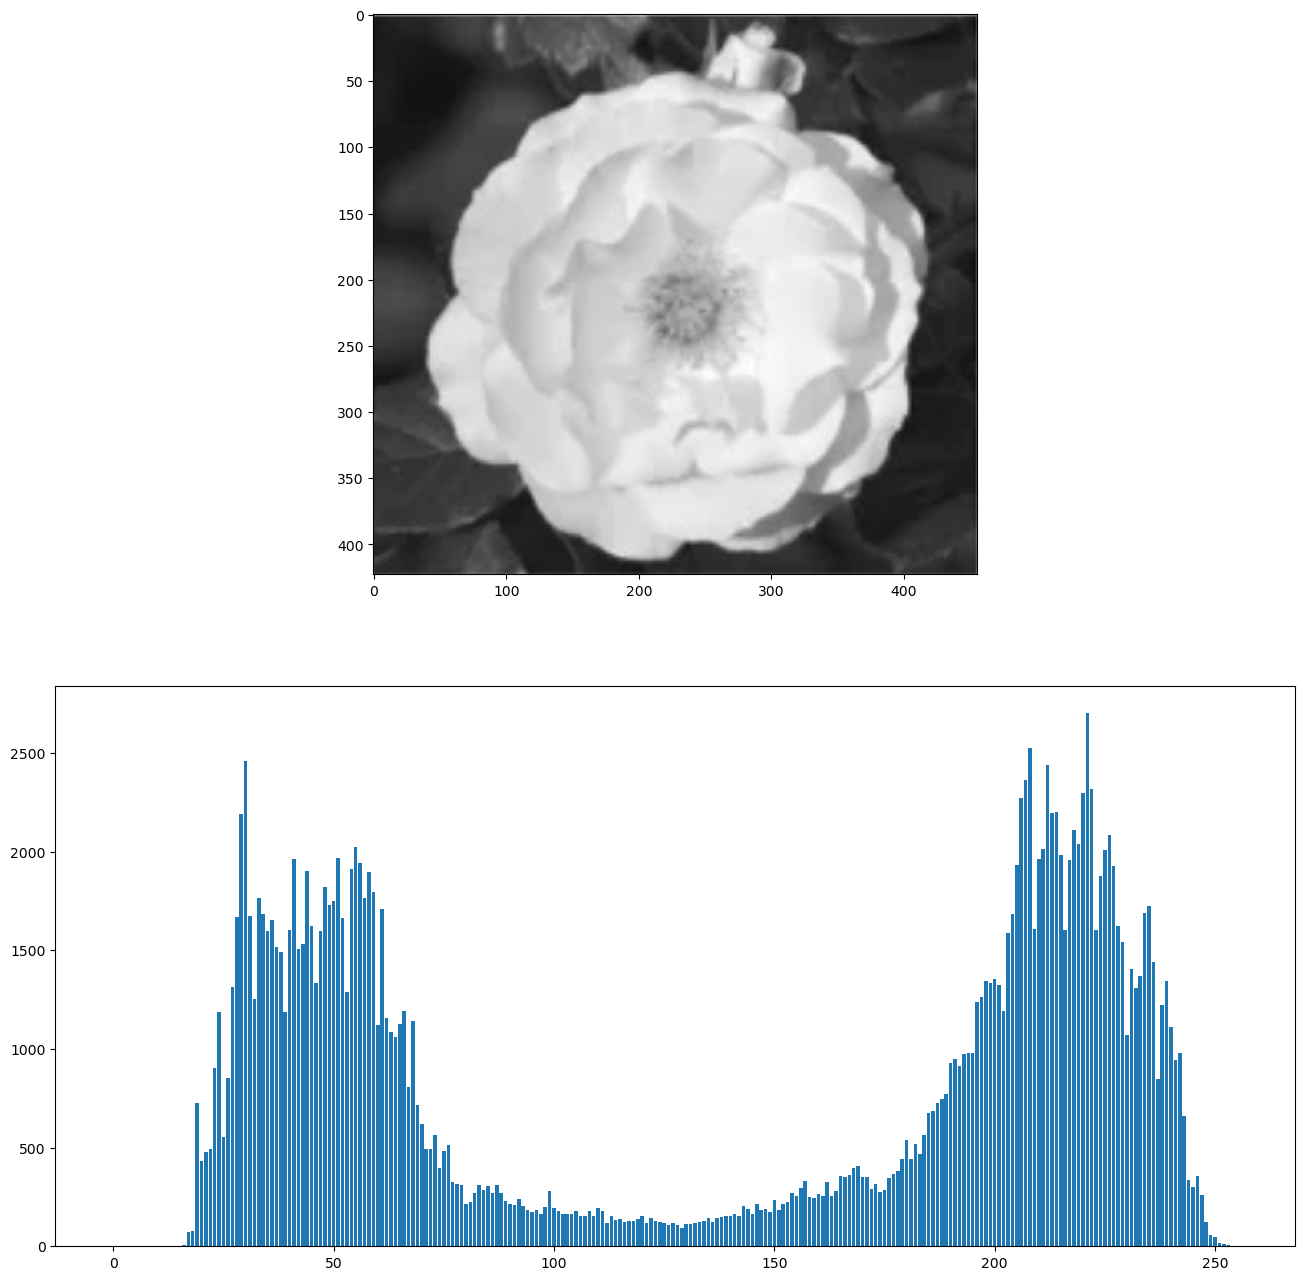

In [13]:
flower = np.array(Image.open('flower.png'))
show_histogram_gray(flower)

### Limitação
* Um histograma não fornece informação sobre a distribuição espacial dos pixels da imagem;
* Imagens diferentes podem compartilhar o mesmo histograma;
* Sendo assim, não é possível reconstruir imagens a partir de seu histograma.

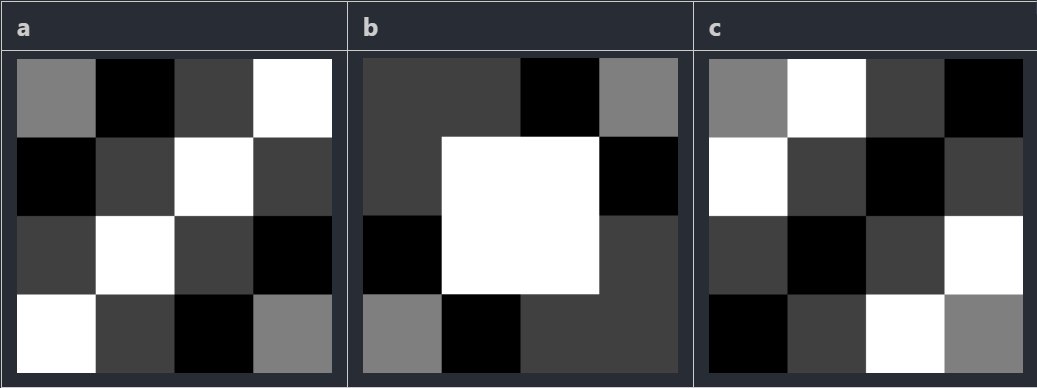

## Equalização
* É uma técnica para ajustar o contraste (escala entre os tons mais luminosos e escuros);
* Quanto menor o contraste, mais fundidas são as cores; quando maior o contraste, mais marcadas são as cores;
* A equalização permite fazer uma melhor distribuição do contraste, ajustando o histograma da imagem;
* Existem várias fórmulas de equalização, não havendo uma "melhor" para todas as situações.

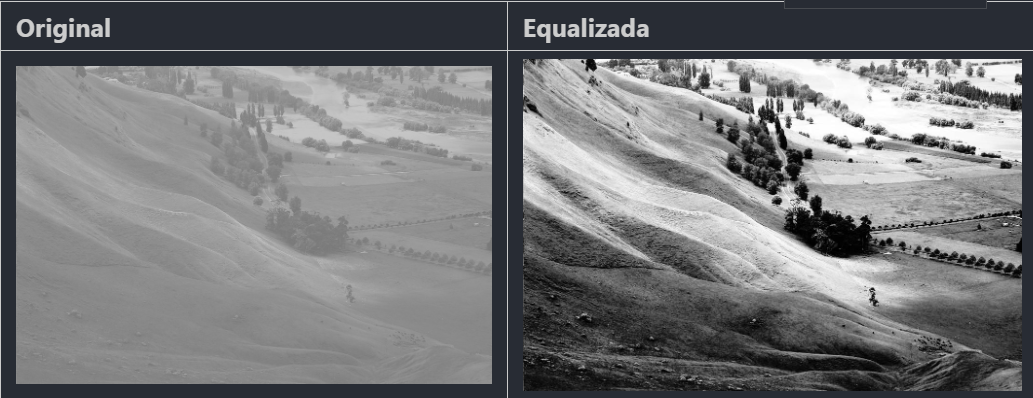